In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from scipy.stats.mstats import winsorize

In [2]:
# ---
# What is Winsorization and When to Use It?
# ---
# Winsorization is a data transformation method used to limit the influence of extreme values, or outliers,
# in a dataset. Instead of removing outliers, it caps them at a certain percentile. For example,
# "winsorizing at the 90% level" means setting all values below the 5th percentile to the 5th percentile,
# and all values above the 95th percentile to the 95th percentile.
#
# When to use it:
# - When you believe that the extreme values are not errors but are still distorting your model or analysis.
# - When you want to reduce the impact of outliers without losing the data points entirely (unlike trimming).
# - It's often used in statistical modeling and finance where extreme events are possible but shouldn't dominate the analysis.
#
# Data Requirements:
# - The data must be numerical.
# - It is most effective on variables with skewed distributions or clear outliers.
# ---



In [3]:
# 1. Load a Sample Dataset
# We'll use the California Housing dataset from scikit-learn, which contains various housing metrics.
housing = fetch_california_housing(as_frame=True)
df = housing.frame
print("Original DataFrame info:")
df.info()
print("\nOriginal DataFrame description:")
print(df.describe())



Original DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Original DataFrame description:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499

In [4]:
# 2. Select a Feature to Work With
# Let's choose the 'AveRooms' (average number of rooms) feature. By looking at the `describe()` output,
# we can see a large difference between the 75th percentile (6.05) and the max value (141.9),
# suggesting the presence of high-end outliers.
feature_to_winsorize = 'AveRooms'



In [5]:
# 3. Apply Winsorization
# We will cap the data at the 5th and 95th percentiles. This means any value below the 2th percentile
# will be replaced by the 2th percentile value, and any value above the 92th percentile will be
# replaced by the 92th percentile value.
# The 'limits' parameter takes the proportion to cut from each tail.
# limits=[0.05, 0.05] means we cap the bottom 5% and the top 5%.
df['AveRooms_winsorized'] = winsorize(df[feature_to_winsorize], limits=[0.02, 0.02])




In [6]:
# 4. Show the Result
# Let's compare the descriptive statistics of the original and winsorized columns.
print("\nComparison of original vs. winsorized data:")
print(df[[feature_to_winsorize, 'AveRooms_winsorized']].describe())





Comparison of original vs. winsorized data:
           AveRooms  AveRooms_winsorized
count  20640.000000         20640.000000
mean       5.429000             5.315902
std        2.474173             1.237169
min        0.846154             2.931153
25%        4.440716             4.440716
50%        5.229129             5.229129
75%        6.052381             6.052381
max      141.909091             8.618943


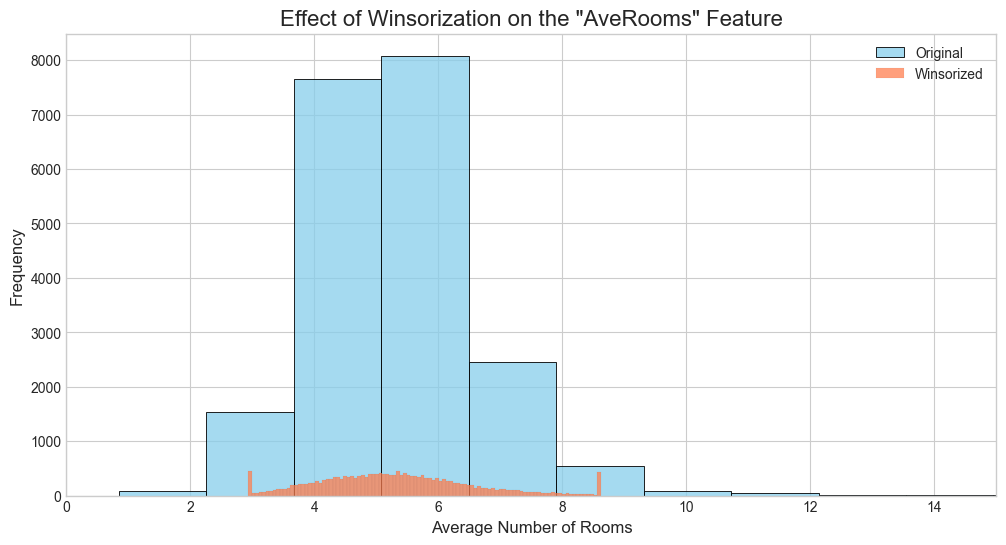

In [7]:
# 5. Create a Before-and-After Visualization
# A histogram is a great way to see the effect of Winsorization. We'll plot both the original
# and the transformed data to see how the tails of the distribution have been handled.
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting histograms
sns.histplot(df[feature_to_winsorize], ax=ax, color='skyblue', label='Original', kde=False, bins=100)
sns.histplot(df['AveRooms_winsorized'], ax=ax, color='coral', label='Winsorized', kde=False, bins=100)

# Adding titles and labels for clarity
ax.set_title(f'Effect of Winsorization on the "{feature_to_winsorize}" Feature', fontsize=16)
ax.set_xlabel('Average Number of Rooms', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()

# We limit the x-axis to better visualize the main distribution and the capped tails.
# Without this, the long tail of the original data would make the chart hard to read.
plt.xlim(0, 15)
plt.show()




In [8]:
# 6. Print the Head of the Resulting DataFrame
# The new DataFrame contains the original feature alongside its winsorized version for comparison.
print("\nHead of the DataFrame with the new winsorized column:")
print(df[[feature_to_winsorize, 'AveRooms_winsorized']].head())


Head of the DataFrame with the new winsorized column:
   AveRooms  AveRooms_winsorized
0  6.984127             6.984127
1  6.238137             6.238137
2  8.288136             8.288136
3  5.817352             5.817352
4  6.281853             6.281853
